In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score



In [38]:
archive = pd.read_csv('Iris.csv')
archive=archive.drop('class', axis=1)
colors = ['#92DCE5', '#F7EC59', '#FF66D8']


In [39]:
archive.shape


(150, 4)

In [40]:
archive.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:

min_thresold, max_thresold = archive.sepallength.quantile([0.001, 0.999])
archive2 = archive[(archive.sepallength<max_thresold) & (archive.sepallength>min_thresold)] 



min_thresold, max_thresold = archive2.sepalwidth.quantile([0.001, 0.999])
archive2 = archive2[(archive2.sepalwidth<max_thresold) & (archive2.sepalwidth>min_thresold)] 




min_thresold, max_thresold = archive2.petallength.quantile([0.001, 0.999])
archive2 = archive2[(archive2.petallength<max_thresold) & (archive2.petallength>min_thresold)] 



min_thresold, max_thresold = archive2.petalwidth.quantile([0.001, 0.999])
archive2 = archive2[(archive2.petalwidth<max_thresold) & (archive2.petalwidth>min_thresold)] 
print(archive2[(archive2.petalwidth<max_thresold) & (archive2.petalwidth>min_thresold)])


archive2.shape




     sepallength  sepalwidth  petallength  petalwidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[136 rows x 4 columns]


(136, 4)

In [ ]:
def davies_bouldin(X, labels):
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, len(X[0])), dtype=float)
    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(cluster_k, [centroid]))

    centroid_distances = pairwise_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)
    return np.mean(scores)

In [51]:
k_means=KMeans(n_clusters=3,random_state=0).fit(archive)
davies_bouldin(3,k_means.labels)


0.0728555151488856


In [44]:
#CONTROLE
kmeans = KMeans(n_clusters=3, random_state=30)
tag = kmeans.fit_predict(archive)
CalculoFinal = davies_bouldin_score(archive, tag)
print(CalculoFinal)

0.662322864989869


In [35]:
k_means=KMeans(n_clusters=3,random_state=0).fit(archive)
k_means.labels_
archive['cluster'] = k_means.fit_predict(archive)
centroids=k_means.cluster_centers_
cen_x=[i[0]for i in centroids]
cen_y=[i[1]for i in centroids]
archive['cen_x'] = archive.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
archive['cen_y'] = archive.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
archive['c'] = archive.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

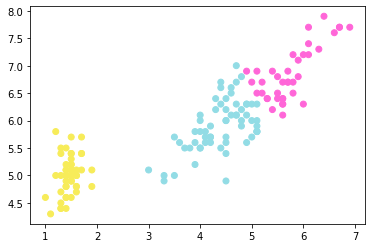

In [9]:
#print(archive)
plt.scatter(archive.petallength,archive.sepallength,c=archive.c)


In [27]:
array=[]

for i in range(1,11):
    k_means=KMeans(n_clusters=i,random_state=0).fit(archive)
    k_means.labels_   
    array.append(k_means.inertia_)

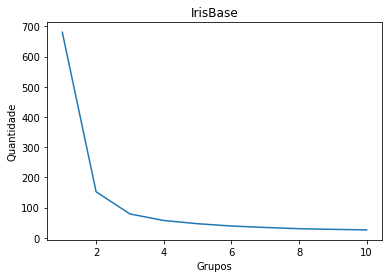

In [ ]:
plt.plot(range(1,11),array)
plt.title("IrisBase")
plt.xlabel("Grupos")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
archive["sepallength"].min(), archive["sepallength"].max()


(4.3, 7.9)

In [ ]:
archive["sepalwidth"].min(), archive["sepalwidth"].max()

(2.0, 4.4)

In [ ]:
archive["petallength"].min(), archive["petallength"].max()

(1.0, 6.9)

In [ ]:
archive["petalwidth"].min(), archive["petalwidth"].max()

(0.1, 2.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bfe95af700>,
 'caps': [<matplotlib.lines.Line2D at 0x2bfe95afca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bfe95af550>,
 'medians': [<matplotlib.lines.Line2D at 0x2bfe95d4280>,
 'fliers': [<matplotlib.lines.Line2D at 0x2bfe95d4550>,
 'means': []}

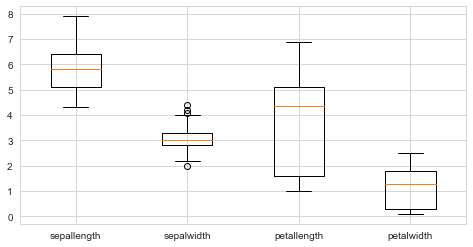

In [32]:
plt.boxplot(archive, labels=['sepallength','sepalwidth','petallength','petalwidth'])
